### Projet Ingenierie des Données 

###                                                                       Par : Mohamed Amine Taif && Ayoub Koussy

In [119]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [120]:
df1 = pd.read_csv("data.csv")

In [121]:
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [122]:
#visualiser notre données pour traiter les valeurs manquant
df1.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


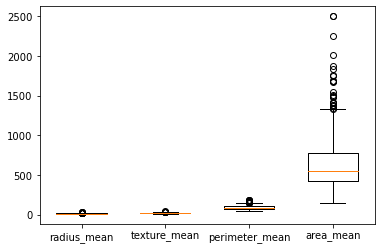

In [123]:
features = ["radius_mean" , "texture_mean" ,"perimeter_mean" ,"area_mean"]
i=1
for feut in features :
    plt.boxplot(df1[feut], positions = [i], widths = 0.6) ;
    i+=1
plt.gca().xaxis.set_ticklabels(features) ;
plt.show()


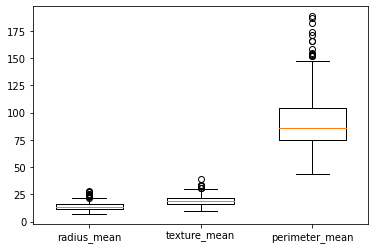

In [124]:
features = ["radius_mean" , "texture_mean" ,"perimeter_mean"]
i=1
for feut in features :
    plt.boxplot(df1[feut], positions = [i], widths = 0.6) ;
    i+=1
plt.gca().xaxis.set_ticklabels(features) ;
plt.show()

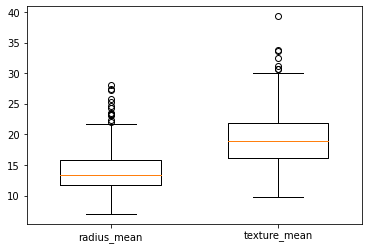

In [125]:
features = ["radius_mean" , "texture_mean"]
i=1
for feut in features :
    plt.boxplot(df1[feut], positions = [i], widths = 0.6) ;
    i+=1
plt.gca().xaxis.set_ticklabels(features) ;
plt.show()

<AxesSubplot:ylabel='diagnosis'>

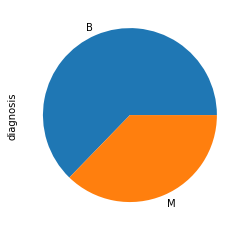

In [126]:
y_label.value_counts(normalize=True).plot(kind='pie')

In [127]:
#sépare data pour en feautres et label
y_label = df1['diagnosis']
df1= df1.drop(['Unnamed: 32' ,'id' , 'diagnosis'], axis=1)

In [128]:
# on normalise notre data
x = df1
x = StandardScaler().fit_transform(x)


### Using correlation 


In [129]:
features = df1.columns.tolist()
df2 = pd.DataFrame(x , columns = features)

In [130]:
# we filter the features using the correlation criteria

temp = list(features)
temp2 = list(features)
for i in range(len(temp2)):
    for j in temp[i:]:
        if temp[i] != j :
            if abs(df2[temp[i]].corr(df2[j])) > 0.7:
                temp.remove(j)
non_corr_data = df2[temp]

In [131]:
def shape(features, df2, seuil):
    temp = list(features)
    temp2 = list(features)
    for i in range(len(temp2)):
        for j in temp[i:]:
            if temp[i] != j :
                if abs(df2[temp[i]].corr(df2[j])) > seuil:
                    temp.remove(j)
    non_corr_data = df2[temp]
    return len(temp)

In [132]:
seuils = []
cars = []
acc_scores = []
seuil = 0.5
for k in range(10):
    s = shape(features,df2, seuil)
    seuils.append(seuil)
    cars.append(s)
    X_train1, X_test1 , Y_train1, Y_test1 = train_test_split(x1, Y, test_size = 0.8)
    LR = LogisticRegression()
    LR.fit(X_train1, Y_train1)
    y_pred = LR.predict(X_test1)
    score1 = LR.score(X_test1, Y_test1)
    acc_scores.append(score1)
    seuil+= 0.05
    

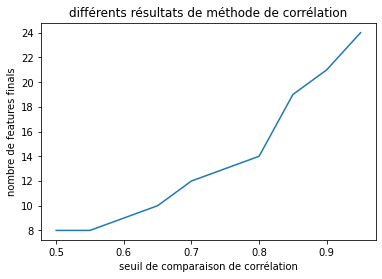

In [133]:
plt.figure()
plt.plot(seuils , cars )
plt.title("différents résultats de méthode de corrélation")

plt.ylabel('nombre de features finals')
plt.xlabel('seuil de comparaison de corrélation')

plt.show()

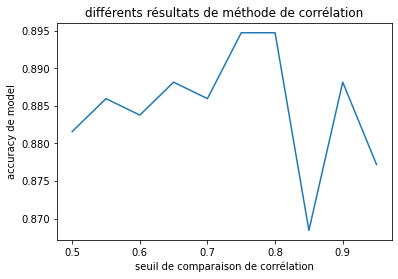

In [134]:
plt.figure()
plt.plot(seuils , acc_scores)
plt.title("différents résultats de méthode de corrélation")

plt.ylabel('accuracy de model')
plt.xlabel('seuil de comparaison de corrélation')

plt.show()


In [135]:
x1 = non_corr_data
x1 = StandardScaler().fit_transform(x1)
x1.shape

(569, 12)

In [136]:
# un test de précision de methode de corrélation
Y = []
for k in y_label :
    if k == 'M' :
        Y.append(1)
    else :
        Y.append(0)
Y = np.array(Y)
X_train1, X_test1 , Y_train1, Y_test1 = train_test_split(x1, Y, test_size = 0.8)
LR = LogisticRegression()
LR.fit(X_train1, Y_train1)
y_pred = LR.predict(X_test1)
score1 = LR.score(X_test1, Y_test1)
print(score1)

0.9605263157894737


### Using PCA

### Correlation Heatmap before pca

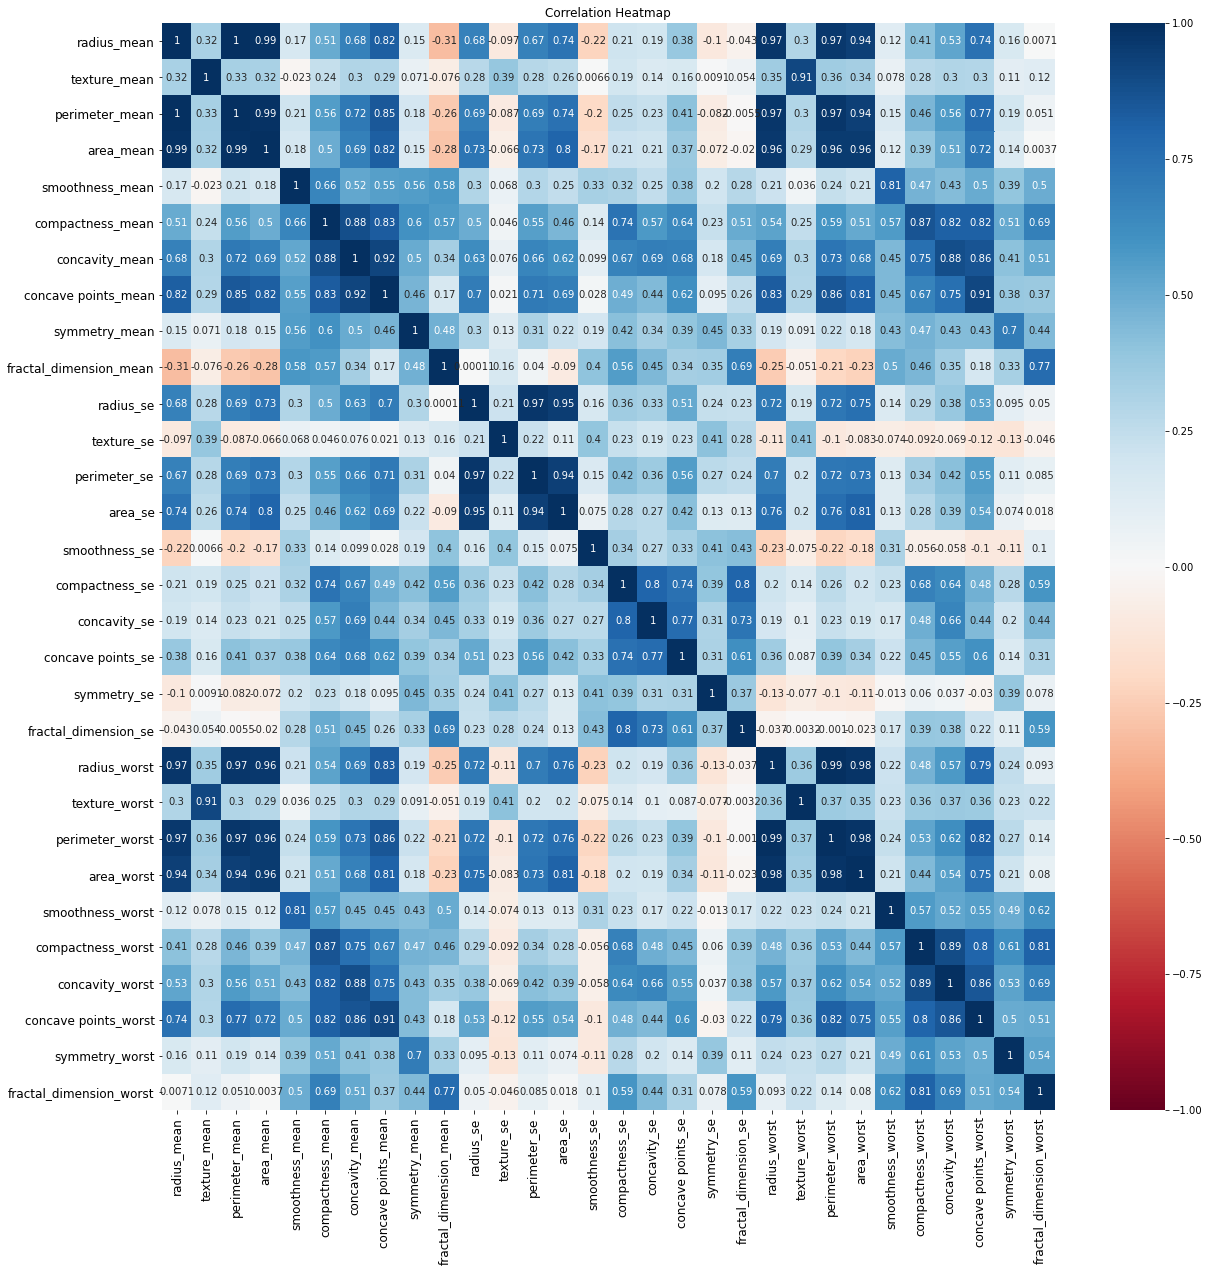

In [137]:
# on visualise la corrélation entre nos features
import seaborn as sns 
 
plt.figure(figsize = (20,20))
s = sns.heatmap(df2.corr(),annot = True,cmap = 'RdBu' ,vmin = -1 ,vmax = 1)
s.set_yticklabels(s.get_yticklabels() , rotation = 0 , fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90 , fontsize =  12)
plt.title('Correlation Heatmap')
plt.show()

### On calcule les inerties de nos variables

In [150]:
pca = PCA().fit(x)
np_cum = np.cumsum(pca.explained_variance_ratio_)
df_cum = pd.DataFrame({'Component':[i for i in range(1,np_cum.shape[0]+1)],'cum_explained_variance_ratio':np_cum})
df_cum2 = pd.DataFrame({'Component':df2.columns,'cum_explained_variance_ratio':np_cum})
filter_df = df_cum[df_cum.cum_explained_variance_ratio>=0.9]
component = int(filter_df.Component.iloc[0])
cum_var = float(filter_df.cum_explained_variance_ratio.iloc[0])
print(f'{component} Components capture {round(cum_var,4)*100}% of the information of the data')

7 Components capture 91.01% of the information of the data


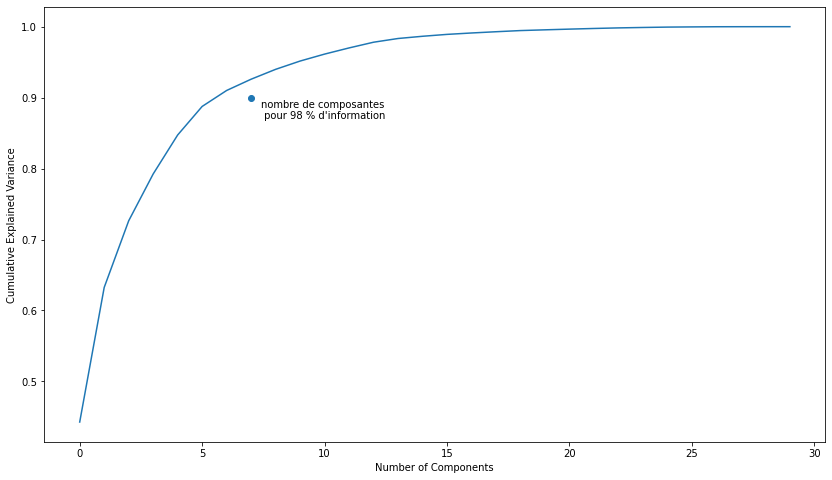

In [151]:
#
threshold = 0.9
fig = plt.figure(figsize=(14,8))
plt.plot(df_cum.cum_explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.scatter(component, threshold)
plt.annotate("nombre de composantes \n pour 98 % d'information", (component+0.4, threshold-0.03))
plt.show()

### we use the number of components we found for pca

In [152]:
n_components=7
pca = PCA(n_components)
principal_comps = pca.fit_transform(x)
print("Nombre de composantes principales : ",pca.n_components_)

print("\ntotal d'information: ",np.cumsum(pca.explained_variance_ratio_)[-1]*100, "% .")

Nombre de composantes principales :  7

total d'information:  91.0095300685072 % .


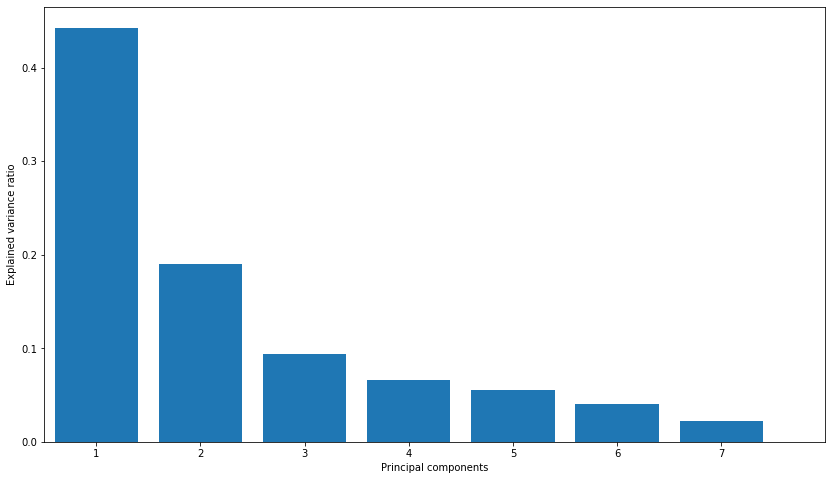

In [153]:
fig = plt.figure(figsize=(14,8))
plt.bar(range(1,8),pca.explained_variance_ratio_,)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xlim([0.5,8])
plt.xticks(range(1,8))
plt.show()

In [154]:
features = ["feature %i" % i for i in range(1,n_components+1)]
data_after_pca= pd.DataFrame(principal_comps , columns = features)
data_after_pca.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411423,2.159370
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028657,0.013377
2,5.733896,-1.075174,-0.551748,0.912082,-0.177086,0.541453,-0.668149
3,7.122953,10.275589,-3.232790,0.152546,-2.960878,3.053425,1.429931
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226493,-0.936248


### Correlation heatmap after pca

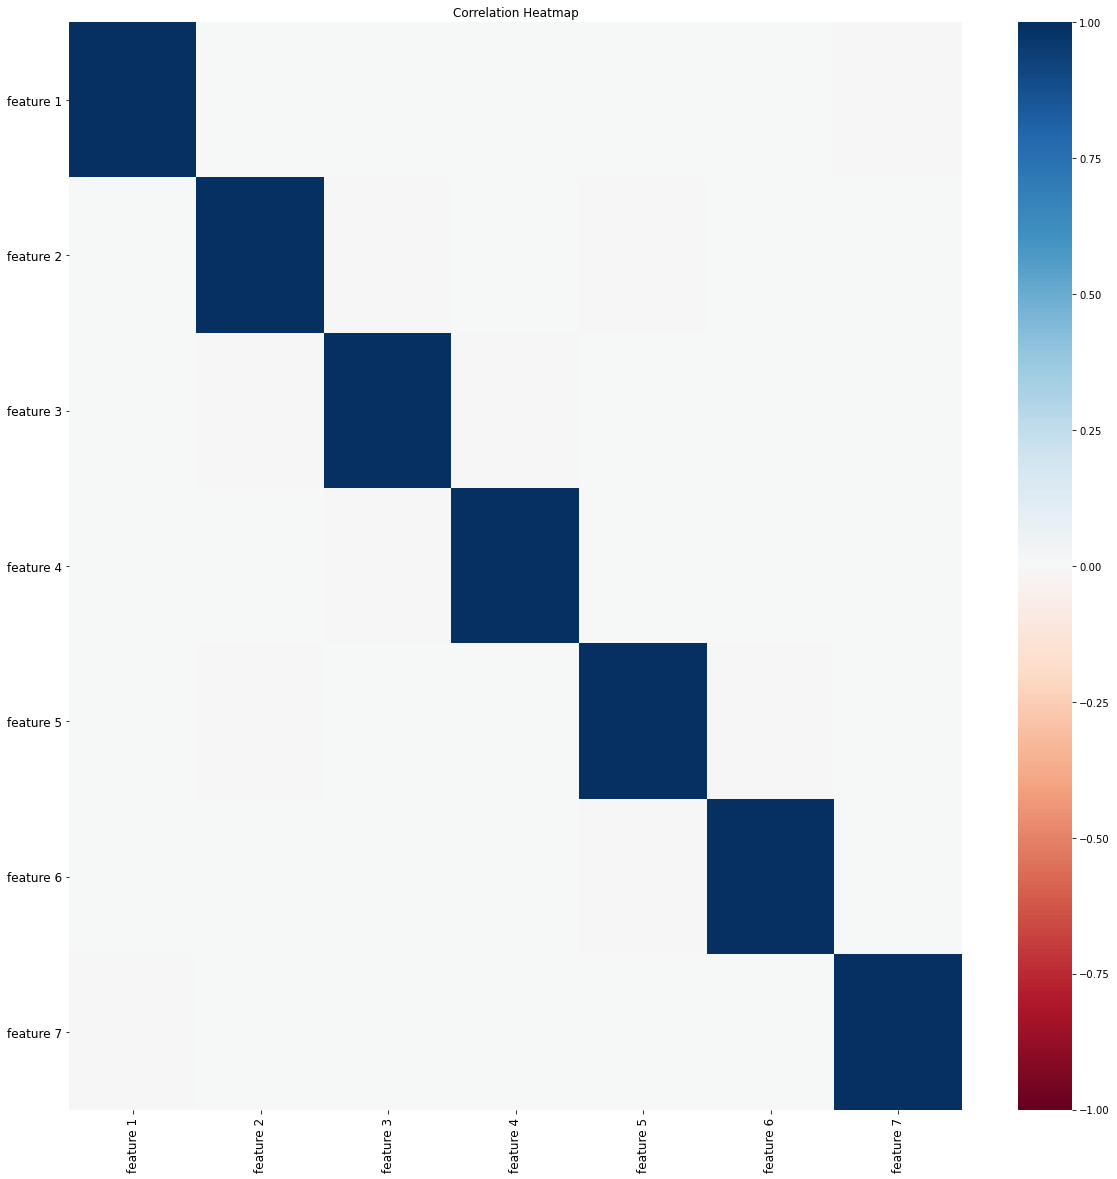

In [155]:
features = ["df%i" % i for i in range(1,8)]

plt.figure(figsize = (20,20))
s = sns.heatmap(data_after_pca.corr(),annot = False,cmap = 'RdBu' ,vmin = -1 ,vmax = 1)
s.set_yticklabels(s.get_yticklabels() , rotation = 0 , fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90 , fontsize =  12)
plt.title('Correlation Heatmap')
plt.show()

In [156]:
Y = np.array(Y)
X_train, X_test , Y_train, Y_test = train_test_split(data_after_pca, Y, test_size = 0.8)
LR = LogisticRegression()
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_test)
score = LR.score(X_test, Y_test)
print(score)

0.9539473684210527


### Accuracy test

In [145]:
# pour les données initiales 

Y = []
for k in y_label :
    if k == 'M' :
        Y.append(1)
    else :
        Y.append(0)
Y = np.array(Y)
acc_list1 = []
for k in range(1000) : 
    
    X_train, X_test , Y_train, Y_test = train_test_split(df2, Y, test_size = 0.8)
    LR = LogisticRegression()
    LR.fit(X_train, Y_train)
    y_pred = LR.predict(X_test)
    score = LR.score(X_test, Y_test)
    acc_list1.append(score)
    

acc = np.mean(acc_list1)

In [146]:
# Pour la méthode de corrélation : 
acc_list2 = []
for k in range(1000):
    X_train1, X_test1 , Y_train1, Y_test1 = train_test_split(x1, Y, test_size = 0.8)
    LR = LogisticRegression()
    LR.fit(X_train1, Y_train1)
    y_pred = LR.predict(X_test1)
    score1 = LR.score(X_test1, Y_test1)
    acc_list2.append(score1)
acc_corr = np.mean(acc_list2)

In [148]:
# Pour la méthode de pca :
acc_list3 = []
for k in range(1000) : 
    
    X_train2, X_test2 , Y_train2, Y_test2 = train_test_split(data_after_pca, Y, test_size = 0.8)
    LR = LogisticRegression()
    LR.fit(X_train2, Y_train2)
    y_pred2 = LR.predict(X_test2)
    score2 = LR.score(X_test2, Y_test2)

    acc_list3.append(score2)
    

acc_pca = np.mean(acc_list3)

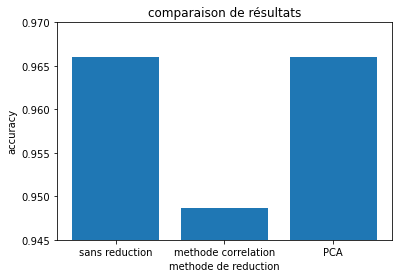

In [149]:
plt.figure()
xx = [acc, acc_corr, acc_pca ]
yy = ['sans reduction', 'methode correlation', 'PCA'] 
plt.bar(yy, xx)
plt.ylim(0.945, 0.97)
plt.xlabel('methode de reduction')
plt.ylabel('accuracy')
plt.title("comparaison de résultats")
plt.show()